In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# ML
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

#ensemble(boosting)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

# 트리 시각화
import graphviz

In [2]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:0000:01


In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

2022-02-23 17:38:09.234672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-23 17:38:10.218458: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-23 17:38:10.219393: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-23 17:38:10.245334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 17:38:10.245950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-23 17:38:10.245979: I tensorflow/stream_executor/platform/default/dso_loade

# 전처리

In [3]:
train=pd.read_csv('/home/lab08/data/train.csv')
test=pd.read_csv('/home/lab08/data/test.csv')
sample_submission=pd.read_csv('/home/lab08/data/sample_submission.csv')

In [6]:
rawData=pd.concat([train, test], axis=0)
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


In [7]:
rawData.apply(lambda x: len(x.unique()))

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               4
dtype: int64

- gender, car, reality 데이터, 문자열에서 정수로 변환

In [10]:
rawData['gender']=rawData['gender'].replace(['F','M'],[0,1])
rawData['car']=rawData['car'].replace(['N','Y'],[0,1])
rawData['reality']=rawData['reality'].replace(['N','Y'],[0,1])
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,0,0,1,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,0,1,0,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


- childe_num 3명이상은 한 그룹으로 묶기

In [11]:
rawData['child_num'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: child_num, dtype: int64

<AxesSubplot:>

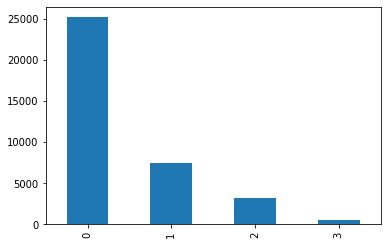

In [12]:
rawData.loc[rawData['child_num'] > 3 , 'child_num']=3
rawData['child_num'].value_counts().plot.bar()

- family_size 5명 이상은 한그룹으로 묶기

In [14]:
rawData.loc[rawData['family_size'] > 5 , 'family_size']=5
rawData['family_size'].value_counts()

2.0    19463
1.0     6987
3.0     6421
4.0     3106
5.0      480
Name: family_size, dtype: int64

- 음수, 양수로 변환

In [48]:
#양수값, 0으로 변환
rawData['DAYS_EMPLOYED'] = rawData['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [55]:
array=['DAYS_BIRTH','DAYS_EMPLOYED','begin_month']

for arr in array:
    rawData[arr]=np.abs(rawData[arr])
    
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,1,0,0,0,NaN,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,1,0,0,1,Laborers,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,1,0,1,0,Managers,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,1,0,1,0,Sales staff,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,1,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,Working,Incomplete higher,Married,House / apartment,18593,5434,1,1,1,0,Accountants,2.0,19.0,NaN
9996,36453,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,10886,1315,1,1,0,0,Laborers,2.0,34.0,NaN
9997,36454,0,0,1,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,21016,14018,1,0,0,0,Medicine staff,2.0,55.0,NaN
9998,36455,0,1,0,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16541,1085,1,0,1,0,NaN,2.0,33.0,NaN


- 파생변수

In [56]:
#(만)나이
rawData['age']=rawData['DAYS_BIRTH']//365

In [57]:
#근속년수(개월)
rawData['EMPLOYED_m']=rawData['DAYS_EMPLOYED']//30

In [58]:
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,EMPLOYED_m
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,1,0,0,0,NaN,2.0,6.0,1.0,38,156
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,0,1,Laborers,3.0,5.0,1.0,31,51
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,0,Managers,2.0,22.0,2.0,52,147
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Sales staff,2.0,37.0,0.0,41,69
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,...,1,0,0,0,Managers,2.0,26.0,2.0,41,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,Working,Incomplete higher,Married,House / apartment,...,1,1,1,0,Accountants,2.0,19.0,NaN,50,181
9996,36453,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,1,1,0,0,Laborers,2.0,34.0,NaN,29,43
9997,36454,0,0,1,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Medicine staff,2.0,55.0,NaN,57,467
9998,36455,0,1,0,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,NaN,2.0,33.0,NaN,45,36


## 결측치 처리
- occyp_type 의 값이 NaN이면서 DAYS_EMPLOYED가 0인 경우 
    - 수입은 있고 퇴직자 -> 연금수급자(pensioner)로 판단 
- occyp_type 의 값이 NaN이면서 DAYS_EMPLOYED가 0이 아닌 경우
    - 직업란 미기재, 기타로 판단?


- income_type 과 연령대 비교안해보고 섣불리 occyp_type 수정하고 덮어씌어버렸다...

In [159]:
rawData['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [17]:
rawData['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [46]:
rawData['occyp_type'][rawData['occyp_type'].isnull()]

0       NaN
8       NaN
14      NaN
18      NaN
19      NaN
       ... 
9988    NaN
9990    NaN
9992    NaN
9994    NaN
9998    NaN
Name: occyp_type, Length: 11323, dtype: object

In [59]:
rawData['DAYS_EMPLOYED'][rawData['DAYS_EMPLOYED']==0 ]

14      0
18      0
21      0
24      0
46      0
       ..
9968    0
9981    0
9988    0
9992    0
9994    0
Name: DAYS_EMPLOYED, Length: 6135, dtype: int64

In [65]:
rawData['income_total'][rawData['income_total']==0 ]
#전부 수입은 있는 상황

Series([], Name: income_total, dtype: float64)

In [60]:
rawData['occyp_type'][rawData['DAYS_EMPLOYED']==0 ]

14      NaN
18      NaN
21      NaN
24      NaN
46      NaN
       ... 
9968    NaN
9981    NaN
9988    NaN
9992    NaN
9994    NaN
Name: occyp_type, Length: 6135, dtype: object

In [68]:
rawData.loc[rawData['DAYS_EMPLOYED']==0 , 'occyp_type']='pensioner'
rawData['occyp_type'].value_counts()

Laborers                 6211
pensioner                6135
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occyp_type, dtype: int64

In [73]:
rawData['occyp_type'][rawData['occyp_type'].isnull()]

0       NaN
8       NaN
19      NaN
20      NaN
23      NaN
       ... 
9974    NaN
9976    NaN
9985    NaN
9990    NaN
9998    NaN
Name: occyp_type, Length: 5188, dtype: object

In [74]:
#나머지를 기타로 변환
rawData.loc[rawData['occyp_type'].isnull(), 'occyp_type']='etc'
rawData['occyp_type'].value_counts()

Laborers                 6211
pensioner                6135
etc                      5188
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occyp_type, dtype: int64

In [114]:
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,EMPLOYED_m
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,1,0,0,0,etc,2.0,6.0,1.0,38,156
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,0,1,Laborers,3.0,5.0,1.0,31,51
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,0,Managers,2.0,22.0,2.0,52,147
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Sales staff,2.0,37.0,0.0,41,69
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,...,1,0,0,0,Managers,2.0,26.0,2.0,41,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,Working,Incomplete higher,Married,House / apartment,...,1,1,1,0,Accountants,2.0,19.0,NaN,50,181
9996,36453,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,1,1,0,0,Laborers,2.0,34.0,NaN,29,43
9997,36454,0,0,1,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Medicine staff,2.0,55.0,NaN,57,467
9998,36455,0,1,0,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,etc,2.0,33.0,NaN,45,36


In [77]:
rawData.isnull().sum() 
#test 의 credit 항목을 제외하고 결측치 없는것을 확인

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type           0
family_size          0
begin_month          0
credit           10000
age                  0
EMPLOYED_m           0
dtype: int64

In [121]:
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,EMPLOYED_m
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,1,0,0,0,etc,2.0,6.0,1.0,38,156
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,0,1,Laborers,3.0,5.0,1.0,31,51
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,0,Managers,2.0,22.0,2.0,52,147
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Sales staff,2.0,37.0,0.0,41,69
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,...,1,0,0,0,Managers,2.0,26.0,2.0,41,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,Working,Incomplete higher,Married,House / apartment,...,1,1,1,0,Accountants,2.0,19.0,NaN,50,181
9996,36453,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,1,1,0,0,Laborers,2.0,34.0,NaN,29,43
9997,36454,0,0,1,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Medicine staff,2.0,55.0,NaN,57,467
9998,36455,0,1,0,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,etc,2.0,33.0,NaN,45,36


In [115]:
test=rawData[-10000:]

In [116]:
train=rawData[:-10000]

In [86]:
pd.DataFrame(train).to_csv('/home/lab08/data/train.csv', index=False)
pd.DataFrame(test).to_csv('/home/lab08/data/test.csv', index=False)

# 데이터 탐색

In [87]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'age',
       'EMPLOYED_m'],
      dtype='object')

In [90]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,EMPLOYED_m
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,1,0,0,0,etc,2.0,6.0,1.0,38,156
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,0,1,Laborers,3.0,5.0,1.0,31,51
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,1,0,Managers,2.0,22.0,2.0,52,147
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Sales staff,2.0,37.0,0.0,41,69
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,...,1,0,0,0,Managers,2.0,26.0,2.0,41,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Core staff,4.0,2.0,1.0,33,66
26453,26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,...,1,0,0,0,etc,2.0,47.0,2.0,41,82
26454,26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,1,0,0,0,Core staff,2.0,25.0,2.0,27,67
26455,26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,1,0,0,0,Laborers,1.0,59.0,2.0,27,3


- 연령대 분포

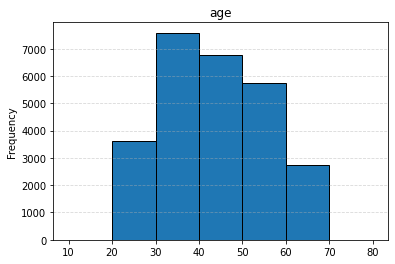

In [132]:
train['age'].plot.hist(edgecolor='k', bins=range(10,81,10))
plt.title('age')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

<AxesSubplot:>

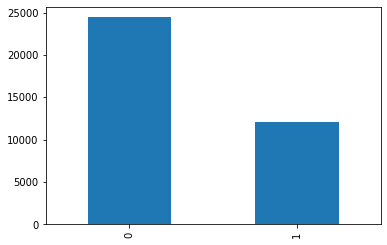

In [124]:
rawData['gender'].value_counts().plot.bar()
#0:F, 1:M 
#여성이 거의 두배

<AxesSubplot:>

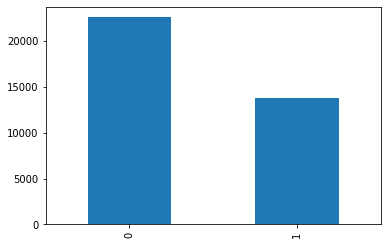

In [125]:
rawData['car'].value_counts().plot.bar()
#0:N, 1:Y

<AxesSubplot:>

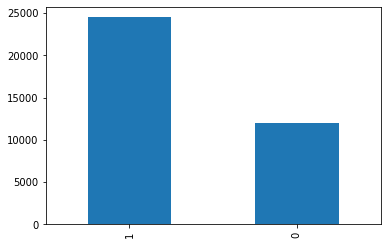

In [126]:
rawData['reality'].value_counts().plot.bar()
#0:N, 1:Y

<AxesSubplot:ylabel='Frequency'>

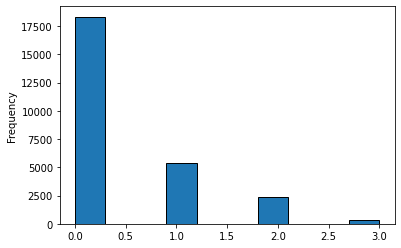

In [136]:
train['child_num'].plot.hist(edgecolor='k')

<AxesSubplot:>

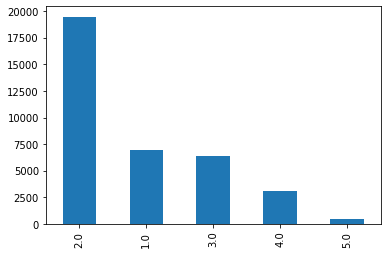

In [128]:
rawData['family_size'].value_counts().plot.bar()

- 소득 그룹으로 나눠서 분포도 탐색

In [137]:
len(train['income_total'].unique())

249

In [154]:
np.histogram(train['income_total'], bins=5)
#5개그룹으로 나누면

(array([24542,  1736,   165,     5,     9]),
 array([  27000.,  336600.,  646200.,  955800., 1265400., 1575000.]))

In [155]:
counts, bin_dividers=np.histogram(rawData['income_total'], bins=5)
df=pd.cut(train['income_total'],bins=bin_dividers, include_lowest=True , labels=[i for i in range(5)])
df

0        0
1        0
2        1
3        0
4        0
        ..
26452    0
26453    0
26454    0
26455    0
26456    0
Name: income_total, Length: 26457, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [156]:
df.value_counts()

0    24542
1     1736
2      165
4        9
3        5
Name: income_total, dtype: int64

<AxesSubplot:ylabel='income_total'>

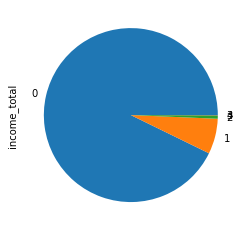

In [158]:
df.value_counts().plot.pie()
# 수입 27000~336600 이 대다수

In [117]:
def makeCorr(x, width=15, height=7):
  plt.figure( figsize=(width, height) )
  mask = np.zeros_like(x.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
  plt.show()

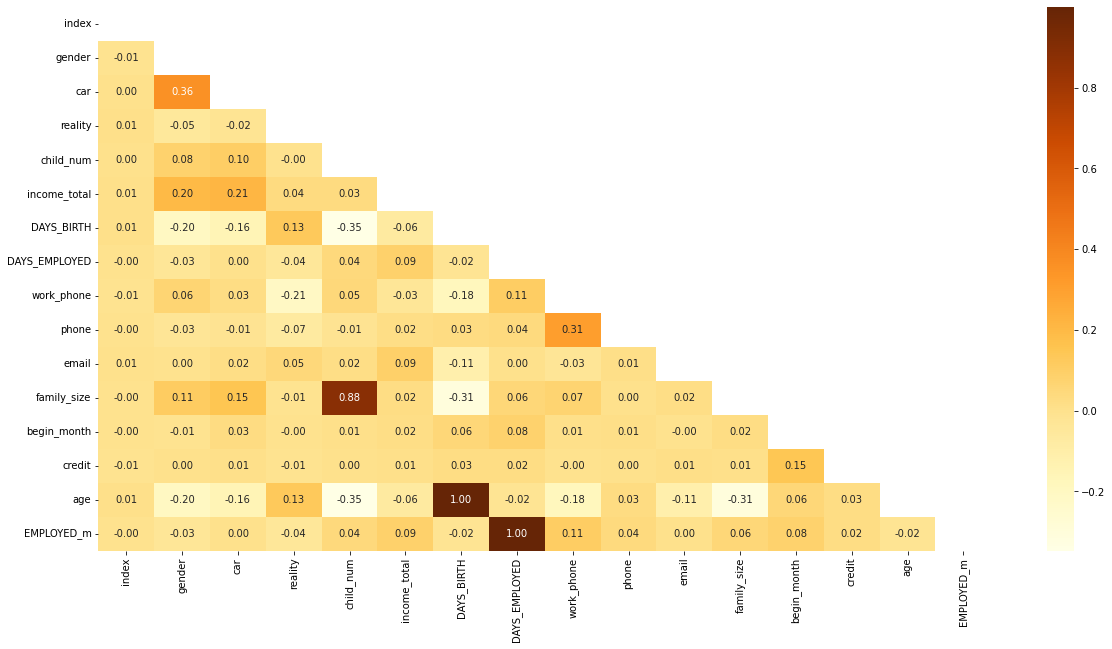

In [122]:
makeCorr( train.drop(columns=['FLAG_MOBIL']), width=20, height=10 )

# 다시..

In [5]:
rawData=pd.concat([train, test], axis=0)

In [6]:
rawData['child_num'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: child_num, dtype: int64

<AxesSubplot:>

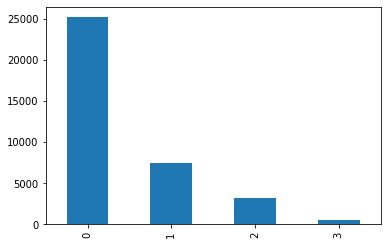

In [7]:
rawData.loc[rawData['child_num'] > 3 , 'child_num']=3
rawData['child_num'].value_counts().plot.bar()

In [8]:
rawData.loc[rawData['family_size'] > 5 , 'family_size']=5
rawData['family_size'].value_counts()

2.0    19463
1.0     6987
3.0     6421
4.0     3106
5.0      480
Name: family_size, dtype: int64

In [9]:
#양수값, 0으로 변환
rawData['DAYS_EMPLOYED'] = rawData['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

#음수값, 양수로 변환
array=['DAYS_BIRTH','DAYS_EMPLOYED','begin_month']

for arr in array:
    rawData[arr]=np.abs(rawData[arr])
    
rawData

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,1,0,0,0,NaN,2.0,6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,1,0,0,1,Laborers,3.0,5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,1,0,1,0,Managers,2.0,22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,1,0,1,0,Sales staff,2.0,37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,1,0,0,0,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,18593,5434,1,1,1,0,Accountants,2.0,19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,10886,1315,1,1,0,0,Laborers,2.0,34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,21016,14018,1,0,0,0,Medicine staff,2.0,55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16541,1085,1,0,1,0,NaN,2.0,33.0,NaN


In [10]:
pd.DataFrame(rawData).to_csv('/home/lab08/data/rawData.csv', index=False)